In [40]:
import os, re
import matplotlib.pyplot as plt
import numpy as np

In [31]:
cmd_build = "gcc -O1 -o mac mac.c"
cmd_run = "./mac %s"
os.system(cmd_build)

0

In [48]:
example = "xxxx, cost time: 0.133 us"
float(re.search(r'time:\s+([\d.]+)', example).group(1))
def out2time(input:str)->float:
    return float(re.search(r'time:\s+([\d.]+)', input).group(1))
def call(cmd:str):
    print("exec command: %s"%cmd)
    out = "out.temp"
    os.system("%s > %s"%(cmd,out))
    with open(out, "r") as r:
        data = r.readline()
        print("output is: %s"%data)
        res = out2time(data)
    os.remove(out)
    return res

In [49]:
pages = [4,16,64,256,1024,1024 * 4,1024 * 8]
times = list(map(lambda page: call(cmd_run%page), pages))

exec command: ./mac 4
exec command: ./mac 16
exec command: ./mac 64
exec command: ./mac 256
exec command: ./mac 1024
exec command: ./mac 4096
exec command: ./mac 8192


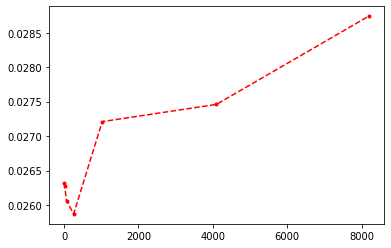

In [52]:
plt.plot(pages, times, "r--.")
# Note. Run each page serval times and get avg time will plot better.

In [53]:
os.remove("mac")